# US_Election Aanalysis

US election dataset picked up from kaggle date range from 1976 to 2020

cleaned data by removing unwanted columns and duplicate values checked

performed Exploratory data analysis and find out some insight, by creating some visualizations 

[Data Analysis with Python: Zero to Pandas](zerotopandas.com), is  best platform for beginner to , learn data analysis using python in concise and logical manner 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinodklmn
Your Kaggle Key: ········


100%|██████████| 133k/133k [00:00<00:00, 173kB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './us-elections-dataset'

In [5]:
import os
os.listdir(data_dir)

['1976-2020-president.csv', '1976-2020-senate.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "US Election Analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "mohit909207/US Election Analysis"
[jovian] Committed successfully! https://jovian.com/mohit909207/us-election-analysis


'https://jovian.com/mohit909207/us-election-analysis'

## Data Preparation and Cleaning

Removing unwanted column, changing datatypes of columns, checking duplicate values



In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('./us-elections-dataset/1976-2020-president.csv')
df.head(10)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN


In [12]:
df.shape

(4287, 15)

In [13]:
for x in df.columns:
    print(x, len(df[x].unique()))
    

year 12
state 51
state_po 51
state_fips 51
state_cen 51
state_ic 51
office 1
candidate 271
party_detailed 173
writein 3
candidatevotes 3755
totalvotes 612
version 1
notes 1
party_simplified 4


total 12 year from 1976, 1980,1984,...,2020

party_simplified has no null 4 values as 'DEMOCRAT', 'REPUBLICAN', 'OTHER', 'LIBERTARIAN'

Total 173 unique parties is identified

Total 51 states

In [14]:
# Dropping Office, version and notes columns
df.drop(columns = ['office','version','notes'], inplace = True)
df

,year,state,state_po,state_fips,state_cen,state_ic,candidate,party_detailed,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,AL,1,63,41,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,"FORD, GERALD",REPUBLICAN,False,504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,OTHER
3,1976,ALABAMA,AL,1,63,41,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,OTHER
4,1976,ALABAMA,AL,1,63,41,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,OTHER
4284,2020,WYOMING,WY,56,83,68,NaN,NaN,True,1739,278503,OTHER
4285,2020,WYOMING,WY,56,83,68,OVERVOTES,NaN,False,279,278503,OTHER


In [15]:
# state_fips, state_cen, state_ic uniquely identify each state 
# we require only 1 column, so we dropping state_cen, state_ic
df.drop(columns = ['state_cen','state_ic'], inplace = True)
df

,year,state,state_po,state_fips,candidate,party_detailed,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,AL,1,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,1,"FORD, GERALD",REPUBLICAN,False,504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,1,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,OTHER
3,1976,ALABAMA,AL,1,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,OTHER
4,1976,ALABAMA,AL,1,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,OTHER
...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,LIBERTARIAN
4283,2020,WYOMING,WY,56,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,OTHER
4284,2020,WYOMING,WY,56,NaN,NaN,True,1739,278503,OTHER
4285,2020,WYOMING,WY,56,OVERVOTES,NaN,False,279,278503,OTHER


In [16]:
df.drop(columns = 'writein',inplace = True)
df

,year,state,state_po,state_fips,candidate,party_detailed,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,AL,1,"CARTER, JIMMY",DEMOCRAT,659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,1,"FORD, GERALD",REPUBLICAN,504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,1,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,9198,1182850,OTHER
3,1976,ALABAMA,AL,1,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,6669,1182850,OTHER
4,1976,ALABAMA,AL,1,"HALL, GUS",COMMUNIST PARTY USE,1954,1182850,OTHER
...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,"JORGENSEN, JO",LIBERTARIAN,5768,278503,LIBERTARIAN
4283,2020,WYOMING,WY,56,"PIERCE, BROCK",INDEPENDENT,2208,278503,OTHER
4284,2020,WYOMING,WY,56,NaN,NaN,1739,278503,OTHER
4285,2020,WYOMING,WY,56,OVERVOTES,NaN,279,278503,OTHER


In [17]:
df.dtypes

year                 int64
state               object
state_po            object
state_fips           int64
candidate           object
party_detailed      object
candidatevotes       int64
totalvotes           int64
party_simplified    object
dtype: object

In [18]:
# coverting year column from integer to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              4287 non-null   datetime64[ns]
 1   state             4287 non-null   object        
 2   state_po          4287 non-null   object        
 3   state_fips        4287 non-null   int64         
 4   candidate         4000 non-null   object        
 5   party_detailed    3831 non-null   object        
 6   candidatevotes    4287 non-null   int64         
 7   totalvotes        4287 non-null   int64         
 8   party_simplified  4287 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 301.6+ KB


In [21]:
#Only Candidates and part_detailed have missing Values ,
#we create separte dataframe by removing null values
df_candidate = df[~df.isnull().any(axis=1)]
df_candidate

,year,state,state_po,state_fips,candidate,party_detailed,candidatevotes,totalvotes,party_simplified
0,1976-01-01,ALABAMA,AL,1,"CARTER, JIMMY",DEMOCRAT,659170,1182850,DEMOCRAT
1,1976-01-01,ALABAMA,AL,1,"FORD, GERALD",REPUBLICAN,504070,1182850,REPUBLICAN
2,1976-01-01,ALABAMA,AL,1,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,9198,1182850,OTHER
3,1976-01-01,ALABAMA,AL,1,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,6669,1182850,OTHER
4,1976-01-01,ALABAMA,AL,1,"HALL, GUS",COMMUNIST PARTY USE,1954,1182850,OTHER
...,...,...,...,...,...,...,...,...,...
4278,2020-01-01,WISCONSIN,WI,55,"CHARLES, MARK",INDEPENDENT,52,3298041,OTHER
4280,2020-01-01,WYOMING,WY,56,"BIDEN, JOSEPH R. JR",DEMOCRAT,73491,278503,DEMOCRAT
4281,2020-01-01,WYOMING,WY,56,"TRUMP, DONALD J.",REPUBLICAN,193559,278503,REPUBLICAN
4282,2020-01-01,WYOMING,WY,56,"JORGENSEN, JO",LIBERTARIAN,5768,278503,LIBERTARIAN


In [22]:
df['candidate'] = df['candidate'].str.strip()

In [23]:
df.loc[df['candidate']=='','candidate']
# dont have empty strings 

Series([], Name: candidate, dtype: object)

In [24]:
# checking duplicate values
df.loc[df.duplicated()]
# don't have Duplicated rows

,year,state,state_po,state_fips,candidate,party_detailed,candidatevotes,totalvotes,party_simplified


In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohit909207/us-election-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/mohit909207/us-election-analysis


'https://jovian.com/mohit909207/us-election-analysis'

## Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Exploring every variable and related values and finding relation and extracting informations and patterns 
> - Make a note of interesting insights from the exploratory analysis


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Year and State Wise Observation

In [30]:
mask = ~df.duplicated(['year','totalvotes'])
df_voteyr = df.loc[mask,['year','state','totalvotes']]
df_voteyr

,year,state,totalvotes
0,1976-01-01,ALABAMA,1182850
7,1976-01-01,ALASKA,123574
11,1976-01-01,ARIZONA,742719
19,1976-01-01,ARKANSAS,767535
23,1976-01-01,CALIFORNIA,7803770
...,...,...,...
4252,2020-01-01,VIRGINIA,4460524
4256,2020-01-01,WASHINGTON,4087631
4263,2020-01-01,WEST VIRGINIA,794652
4267,2020-01-01,WISCONSIN,3298041


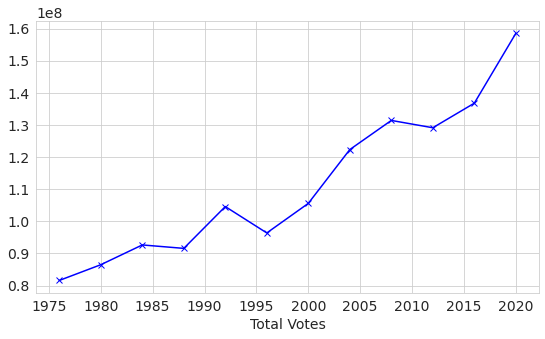

In [32]:
df_tvote_yr = df_voteyr.groupby('year', as_index = False)['totalvotes'].sum()
plt.plot(df_tvote_yr.year, df_tvote_yr.totalvotes,'-xb')
plt.xlabel('year')
plt.xlabel('Total Votes');

In [33]:
df['year'] = pd.DatetimeIndex(df['year']).year #changing to year only

df_temp = df.groupby(['year', 'state'], as_index=False)['candidatevotes'].sum().pivot(index='state',columns='year',values='candidatevotes')
df_temp

year,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
state,,,,,,,,,,,,
ALABAMA,1182850,1341929,1441713,1378476,1688060,1534349,1666272,1883415,2099819,2074338,2123372,2323282
ALASKA,123574,158445,207605,200116,258506,241620,285560,312598,326197,300495,318608,359530
ARIZONA,742719,873945,1025897,1171873,1486975,1404405,1532016,2012585,2293475,2299254,2573165,3387326
ARKANSAS,767535,837582,884406,827738,950653,884262,921781,1054945,1086617,1069468,1130635,1219069
CALIFORNIA,7803770,8582938,9505041,9887065,11131721,10019469,10965822,12421353,13561900,13038547,14181595,17500881
COLORADO,1081440,1184450,1295380,1372394,1569180,1510702,1741368,2129630,2401361,2569516,2780220,3279980
CONNECTICUT,1386355,1406285,1466900,1443394,1616156,1392614,1459525,1578769,1646792,1558204,1644920,1823857
DELAWARE,235642,235668,254572,249891,289620,270810,327529,375190,412412,413890,441590,504346
DISTRICT OF COLUMBIA,168830,173889,211288,192877,227572,185726,201894,227586,265853,293764,312575,344356


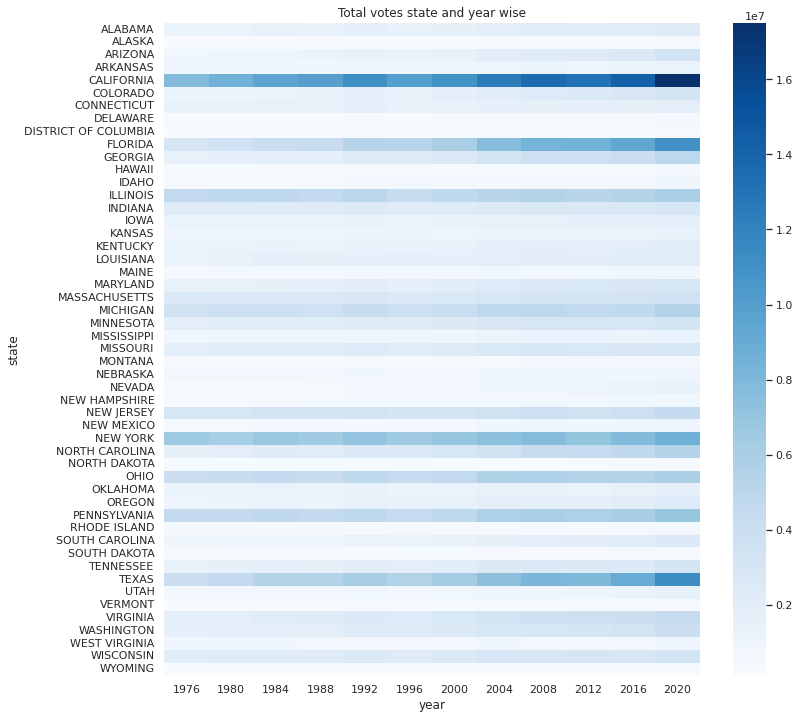

In [34]:
sns.set(rc={'figure.figsize':(12,12)})
plt.title('Total votes state and year wise')
sns.heatmap(df_temp, cmap='Blues');

### It is quite eveident that total votes are increasing by year & major state contributing to voting are -
 1. California
 2. Texas
 3. Florida
 4. NewYork

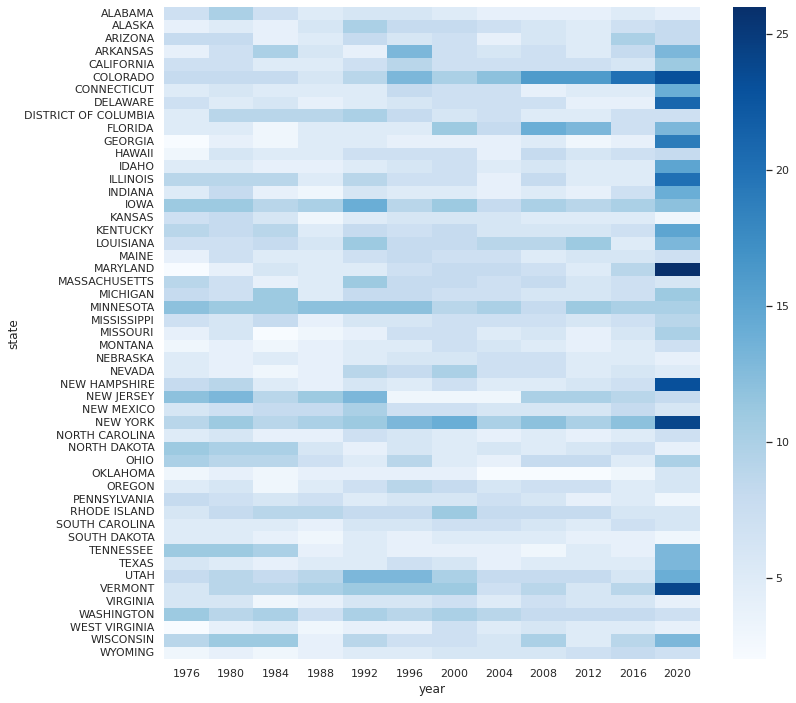

In [35]:
df_temp_count = df.groupby(['year', 'state'], as_index=False)['candidatevotes'].count()
df_temp_count = df_temp_count.pivot(index='state',columns='year',values='candidatevotes')
sns.heatmap(df_temp_count, cmap = 'Blues');

### following state have more number of candidates actively participating in election

1. Maryland
2. Ney York
3. New Hampshire
4. Vermont

### Exploring Top Parties along years 

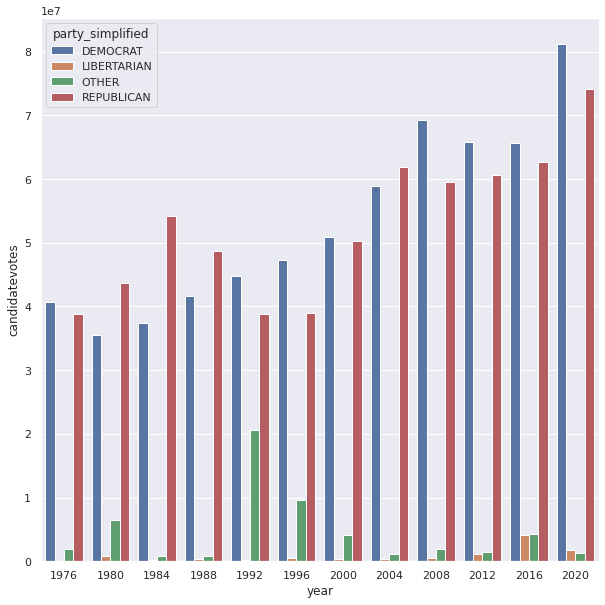

In [36]:
df_ps = df.groupby(['year','party_simplified'], as_index = False)['candidatevotes'].sum()
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x = 'year', y = 'candidatevotes', hue = 'party_simplified', data = df_ps);

### As it is quiet evident that major parties is Democrat and Republican

### Let's see statewise results in 2020

In [40]:
df_2020 = df[df['year']==2020].groupby(['state','state_po','party_simplified'], as_index=False)['candidatevotes'].sum()
# Adding percent column showing percent of votes gained by each party in every state
df_2020['per_votes'] = 100 * df_2020['candidatevotes'] / df_2020.groupby('state')['candidatevotes'].transform('sum')
df_2020['per_votes']=df_2020['per_votes'].round(2)
df_2020

,state,state_po,party_simplified,candidatevotes,per_votes
0,ALABAMA,AL,DEMOCRAT,849624,36.57
1,ALABAMA,AL,LIBERTARIAN,25176,1.08
2,ALABAMA,AL,OTHER,7312,0.31
3,ALABAMA,AL,REPUBLICAN,1441170,62.03
4,ALASKA,AK,DEMOCRAT,153778,42.77
...,...,...,...,...,...
194,WISCONSIN,WI,REPUBLICAN,1610184,48.82
195,WYOMING,WY,DEMOCRAT,73491,26.39
196,WYOMING,WY,LIBERTARIAN,5768,2.07
197,WYOMING,WY,OTHER,5685,2.04


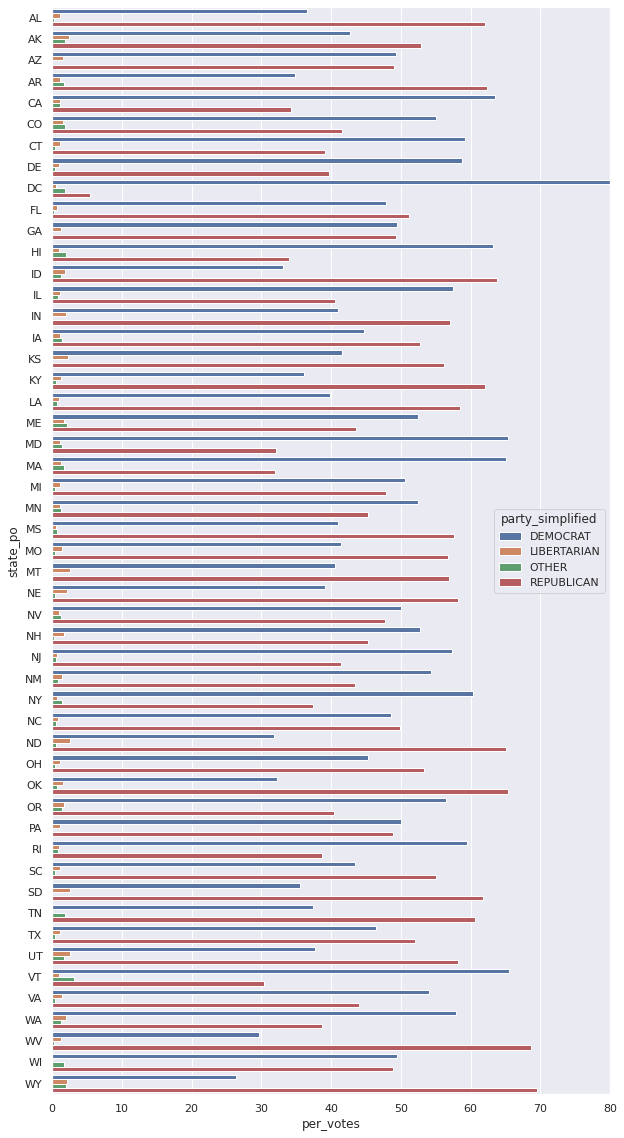

In [41]:
plt.figure(figsize=(10,20))
a = sns.barplot(x = 'per_votes', y = 'state_po', hue = 'party_simplified', data = df_2020)
a.set_xlim(0,80);

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

#### Insights till now



#### Q1: what is trend number of voting candidates with time

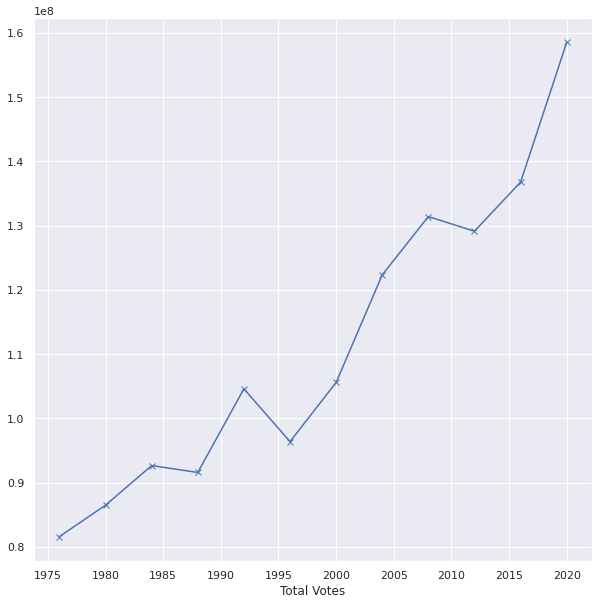

In [42]:
df_tvote_yr = df_voteyr.groupby('year', as_index = False)['totalvotes'].sum()
plt.plot(df_tvote_yr.year, df_tvote_yr.totalvotes,'-xb')
plt.xlabel('year')
plt.xlabel('Total Votes');

#### Every year voting candidates are increasing rapidly

#### Q2: which are major states contributing to votings 

#### It is quite eveident that total votes are increasing by year & major state contributing to voting are -
 1. California
 2. Texas
 3. Florida
 4. NewYork

#### Q3: which states have most number of candidates participating in election race

#### following state have more number of candidates actively participating in election

1. Maryland
2. Ney York
3. New Hampshire
4. Vermont

#### Q4: which are major parties

#### As it is quiet evident from above graphs that major parties is Democrat and Republican

#### Q5: Create a function , to calculate winning Party in given election year

#### there is electoral college system to assign seat to winning party so, imported state wise number of electoral college CSV file (created by me using web page import)

In [44]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vinodklmn/us-electoral-colleges-in-states')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinodklmn
Your Kaggle Key: ········


100%|██████████| 376/376 [00:00<00:00, 759kB/s]

In [47]:
df_ec = pd.read_csv('./us-electoral-colleges-in-states/state_ec.csv')
df_ec

,state_po,ec
0,AL,9
1,AK,3
2,AZ,11
3,AR,6
4,CA,54
5,CO,10
6,CT,7
7,DE,3
8,DC,3
9,FL,30


In [49]:
def us_results(yr):
    df_yr = df[df['year']==yr].groupby(['state','state_po','party_simplified'], as_index=False)['candidatevotes'].sum()
    df_yr_max = df_yr.groupby(['state','state_po'], as_index=False).apply(lambda x: x.nlargest(1,['candidatevotes'])).reset_index(drop=True)
    new_df = pd.merge(df_yr_max, df_ec, on='state_po')
    win = new_df.groupby('party_simplified',as_index=False)['ec'].sum()
    print(win.loc[win.ec == max(win.ec),'party_simplified'])

In [50]:
us_results(2020)
## correct confirmed with Goggle 

0    DEMOCRAT
Name: party_simplified, dtype: object


In [51]:
us_results(2012)
## correct confirmed with Goggle :)

0    DEMOCRAT
Name: party_simplified, dtype: object


In [52]:
us_results(2008)
## correct confirmed with Goggle :):)

0    DEMOCRAT
Name: party_simplified, dtype: object


Let us save and upload our work to Jovian before continuing.

In [53]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohit909207/us-election-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/mohit909207/us-election-analysis


'https://jovian.com/mohit909207/us-election-analysis'

## Inferences and Conclusion

#### Most Party campaign and rallies can performed by targeting this states
 1. California
 2. Texas
 3. Florida
 4. NewYork
 
#### Monopoly of  Democrat and Republican parties
##### Created a function called us_results taking arguments election year and data ,calculate and  give back winning party , using actual US election method to find out winning party also results are verified through google

In [57]:
import jovian

In [58]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohit909207/us-election-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/mohit909207/us-election-analysis


'https://jovian.com/mohit909207/us-election-analysis'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

In [61]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>